## Importamos la librería pandas



In [1]:
import pandas as pd

## Cargamos Archivo que utilizaremos

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv') 
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Mostramos Lectura de la Columna "sales"

In [3]:
data['Sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## Graficamos Diagrama de Dispersión

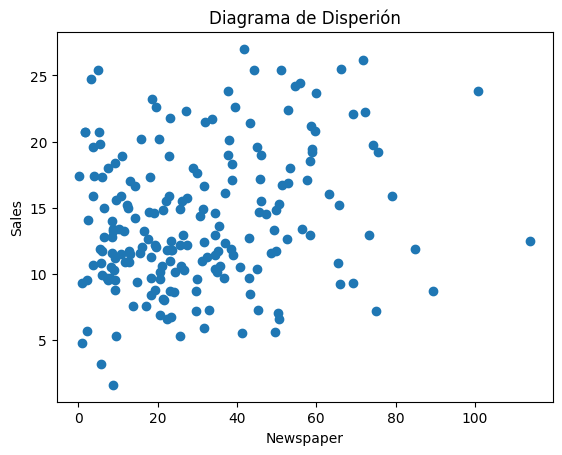

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Diagrama de Disperión")
plt.show()

## Reconfiguramos la estructura de la data ya que viene de un dataframe

In [5]:
# TV, Radio y Newspaper seran nuestras variables explicatorias
X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
# las ventas seran el valor a predecir
Y = data['Sales'].values.reshape(-1,1)

print('X =', X.shape)
print('Y =', Y.shape)

X = (200, 3)
Y = (200, 1)


## Realizamos remuestreo: train = 70% , test = 30%


In [6]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state = 123)

train_Y = train_Y.reshape(-1)
test_Y = test_Y.reshape(-1)

print('X train = ', train_X.shape)
print('Y train = ', train_Y.shape)
print('X test  = ', test_X.shape)
print('Y test  = ', test_Y.shape)

X train =  (140, 3)
Y train =  (140,)
X test  =  (60, 3)
Y test  =  (60,)


## Extraemos Variables Individuales

In [7]:
# Vamos a extraer TV (primera columna) de X tanto del train como el test set

train_X_TV = train_X[:, 0].reshape(-1, 1)
test_X_TV = test_X[:, 0].reshape(-1, 1)

print('X train TV = ', train_X_TV.shape)
print('X test TV  = ', test_X_TV.shape)

X train TV =  (140, 1)
X test TV  =  (60, 1)


## Creamos Primer Modelo de Regresión : Sales ~ TV

In [8]:
from sklearn.linear_model import LinearRegression

lm_1 = LinearRegression()  #objeto para manejar regresion lineal
lm_1.fit(train_X_TV, train_Y)  #creamos modelo X y 

LinearRegression()

## Extaemos la Pendiente del Modelo

In [9]:
lm_1.coef_

array([0.04698313])

## Extraemos el Intercepto del Modelo

In [10]:
 lm_1.intercept_

7.076627298790265

## Mostramos Gráfica de Regresión

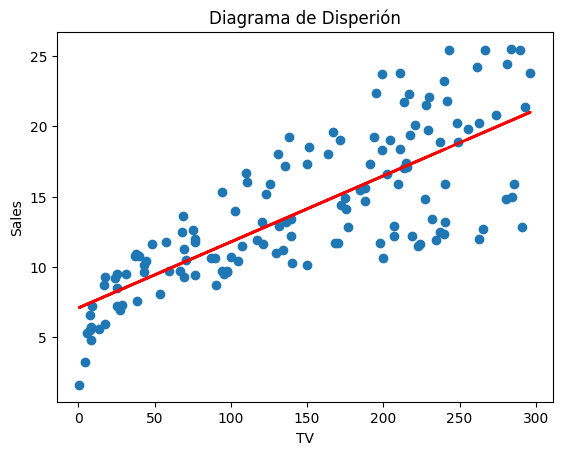

In [11]:
train_Y_predict = lm_1.predict(train_X_TV)
plt.scatter(train_X_TV, train_Y)
plt.plot(train_X_TV, train_Y_predict, color="red",  linewidth=2)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Diagrama de Disperión")
plt.show()

## Evaluamos Valor del R^2 

In [12]:
R2 = lm_1.score(train_X_TV, train_Y)
print('R^2 = %.02f' % R2)

R^2 = 0.60


## Evaluamos el Valor del RMSE

In [13]:
import math
from sklearn import metrics


test_Y_predict = lm_1.predict(test_X_TV)
MSE = metrics.mean_squared_error(test_Y, test_Y_predict) 
print('RMSE = %.02f' % math.sqrt(MSE))

RMSE = 3.09
